In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_csv('placement.csv')

In [3]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
data.shape

(1000, 3)

<Figure size 1000x1000 with 0 Axes>

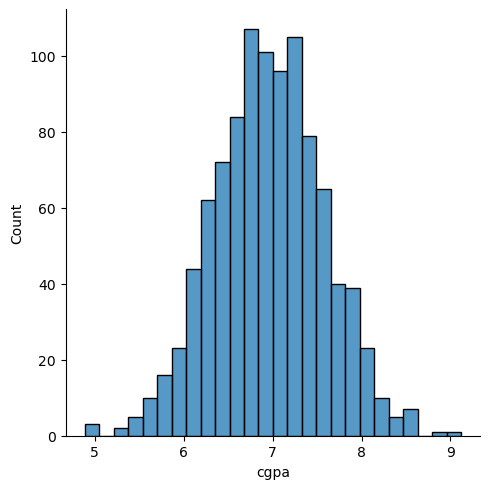

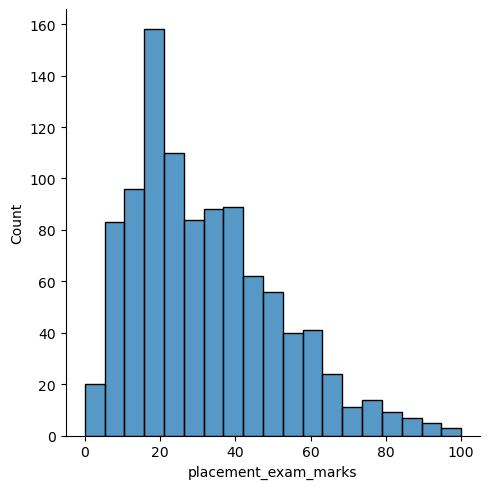

In [5]:
# As we know first we will check the distribution of column how the columns are distributed !
#On the basis of that we will select the outlier detection method and removal method

plt.figure(figsize =(10,10))
sns.displot(data['cgpa'])

sns.displot(data['placement_exam_marks'])



In [6]:
#We can confirm either placement exam marks is left skewed ror not ! 

data['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
# mean , max value (upper limit) , min(lower limit) , std
mean = data['cgpa'].mean()
std = data['cgpa'].std()
max = data['cgpa'].max()
min = data['cgpa'].min()

In [8]:
print(f'the mean of cgpa col is {mean}')
print(f'the standard deviation of cgpa col is {std}')
print(f'the max of cgpa col is {max}')
print(f'the min of cgpa col is {min}')

the mean of cgpa col is 6.96124
the standard deviation of cgpa col is 0.6158978751323894
the max of cgpa col is 9.12
the min of cgpa col is 4.89


In [9]:
#Calculation of boundary values mean + 3std and mean - 3std

upper = mean+3*std
lower = mean-3*std

In [10]:
print(upper)
print(lower)

8.808933625397168
5.113546374602832


In [11]:
#Finding the outliers 
data[(data['cgpa'] > 8.8) | (data['cgpa'] < 5.1) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [12]:
#Lets's first calculate Z score 

data['zscore'] = (data['cgpa']-mean)/std

In [13]:
data

,cgpa,placement_exam_marks,placed,zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


### TRIMMING

In [14]:
#Approach -1 :
new_data = data[(data['cgpa'] < 8.8) & (data['cgpa'] > 5.1)]  
new_data

,cgpa,placement_exam_marks,placed,zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [18]:
# Approach-2 using z score 
new_df_2 = data[(data['zscore'] > 3) | (data['zscore'] <-3)]
new_df_2

,cgpa,placement_exam_marks,placed,zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# CAPPING

In [23]:
#we already had upper and lower limit values . Uppper is 8.1 n lower is 5.1 .

#In capping if any value above upper limit will be replaced by upper limit same with lower limit and remaining will be same

# No rows gt deleted it will only get replaced .

data['cgpa'] = np.where(data['cgpa']>upper , upper ,np.where (data['cgpa']<lower, lower , data['cgpa']))

In [24]:
data

,cgpa,placement_exam_marks,placed,zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [22]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [25]:
#data description shows we have max values as 8.8 and min a 5.1 that means we don't have any outliers now!